In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Gaining Perspective on Stock prices
* Examining Schuberger stock
* Using Boolean indexing to extract a Series
* Plotting all points
* Highlightinh those in upper and lower 10%

In [2]:
slb = pd.read_csv(r'C:\Users\user\Desktop\Git_Python\New folder\data\slb_stock.csv',index_col='Date',parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [3]:
#selecting 'close' prices as series and describe for summary statics for series method
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1,.9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [4]:
#using Bollen select all the 'Close' prices in upper and lower 10%
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10)|(slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]


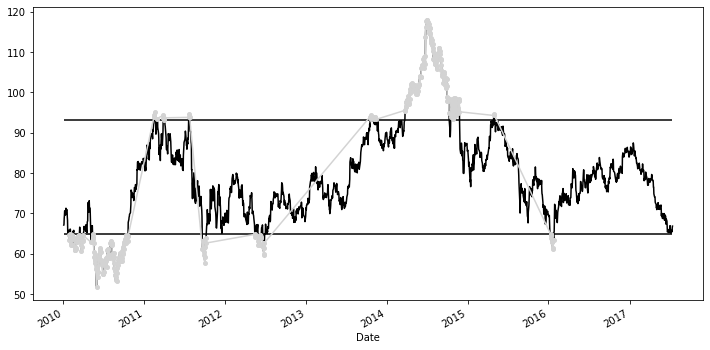

In [5]:
# for the visuvalisation
slb_close.plot(color='black',figsize=(12,6)) #plot the color and fig size
slb_top_bottom_10.plot(marker='o',style='',ms=4,color='lightgray')  
#then plot top and bottom and style is set for empty space so no line is draw and ms set for marker size

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10,upper_10],xmin=xmin,xmax=xmax,color='black') 
#hlines that plots horizontal lines ,it takes the y-values and plot them into xmin and xmax

# Translating SQL where clauses
* Writing Pandas code that is equivalent to SQL query
* Selecting certain subset of the employee dataset

# Sequal statment

In [6]:
df = pd.read_csv(r'C:\Users\user\Desktop\Git_Python\New folder\data\employee.csv')
df.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [7]:
# Filtering the each columns
df.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [8]:
# Filtering the Gender columns
df.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

# Filtering the Slarary colume by Statical math

In [9]:
df.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [10]:
# Checking the quality of the one column criteria by using(.isin)method
depts = ['Houston Police Department-HPD ','Houston Fire Department (HFD) ']
criteria_dept = df.DEPARTMENT.isin(depts) 
#isin method displays all possible values to disply
criteria_gender = df.GENDER == 'Female'
criteria_sal = (df.BASE_SALARY >= 80000) & (df.BASE_SALARY <= 120000)

In [11]:
# combining BOOLEN series with and logical Operator
criteria_final = criteria_dept & criteria_gender & criteria_sal

In [12]:
# Selecting only the rows of the bollen indexing criteria
select_columns = ['UNIQUE_ID','DEPARTMENT','GENDER','BASE_SALARY']
df.loc[criteria_final,select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY


## Determining the Normality of Stock Market Returns
* Finding daily stock market returns of Amazon
* Informally testing wether they follow normal distribution

In [13]:
amz = pd.read_csv(r'C:\Users\user\Desktop\Git_Python\New folder\data\amzn_stock.csv',index_col='Date', parse_dates=['Date'])
amz.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [14]:
#Creating a colsing price as Series method by using '.pct_change()'
#to get the daily rate of returns
#the '.PCT_RETURN': will caliculate the present value and previous value of the percentage element

amz_daily_return = amz.Close.pct_change()
amz_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

<AxesSubplot:>

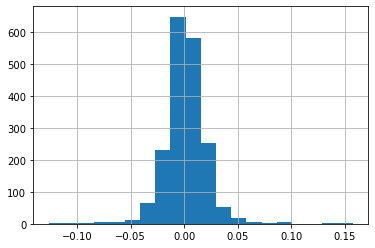

In [15]:
#replacing drop values with zeroes and ploting the graph
amz_daily_return = amz_daily_return.dropna()
amz_daily_return.hist(bins=20)
#from the plot shows the graph is symetrical

In [16]:
# defining the mean and standard devation
mean = amz_daily_return.mean()
std = amz_daily_return.std()

In [17]:
#caliculating the z-score of the each observation with absolute of each observation
abs_z_score = amz_daily_return.sub(mean).abs().div(std)

In [18]:
#finding the percentage of returns of STD of 1,2,3 rules
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard devation.'
      '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard devation.0.956 within 2 and 0.985 within 3


* Here we use for the loop iteration to defininf the abs_z_score.lt(i)is aseries of bollen as bollen elevators to represents 0 or 1,and the mean of the series returns the percentage of the element that are True.
* Here we determine the amazon is not following the Normaldistribution

#### Improving the Readabality of Boolean Indexing with the Query Method
* Filtering employes data for female employees :
* from police or fire departments
* Salary b/w $80k and 120k

In [19]:
df1 = pd.read_csv(r'C:\Users\user\Desktop\Git_Python\New folder\data\employee.csv')
df1.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [20]:
depts = ['Houston Police Department-HPD','Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID','DEPARTMENT','GENDER','BASE_SALARY']

In [21]:
#building Quary string
qs = "DEPARTMENT in @depts "\
         "and GENDER =='Female'"\
         "and 8000 <=BASE_SALARY<=120000"
emp_filtered = df1.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
55,55,Houston Police Department-HPD,Female,34757.0
61,61,Houston Fire Department (HFD),Female,96668.0
67,67,Houston Police Department-HPD,Female,66614.0
113,113,Houston Police Department-HPD,Female,66614.0
123,123,Houston Police Department-HPD,Female,43443.0


In [22]:
# if we want define Female employe which are not member of top 10 department
top10_depts = df.DEPARTMENT.value_counts().index[:10].tolist()
qs = "DEPARTMENT not in @top10_depts and GENDER =='Female'"
emp_filtered2 = df.query(qs)
emp_filtered2[['DEPARTMENT','GENDER']].head()      

,DEPARTMENT,GENDER
0,Municipal Courts Department,Female
73,Human Resources Dept.,Female
96,City Controller's Office,Female
117,Legal Department,Female
146,Houston Information Tech Svcs,Female


# Preserving Series with the WHERE Method
* Boolean indexing removes rows that dont match the criteria
* These values can be kept using where method
* Where method preserves the size
* It sets values that dont meet the criteria to missing
* Or,replaces them with something else

In [23]:
df2 = pd.read_csv(r'C:\Users\user\Desktop\Git_Python\New folder\data\movie.csv',index_col='movie_title')
fb_likes = df2['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [24]:
#converting statistics and percentages and convert into float to int
fb_likes.describe(percentiles=[.1,.25,.5,.75,.9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

<AxesSubplot:>

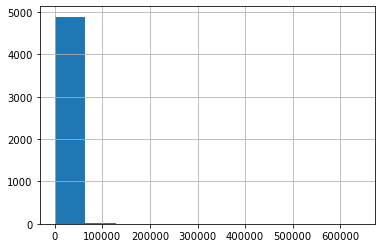

In [25]:
#for visualisation plot graph
fb_likes.hist()

this is a bad visualisation

In [26]:
#leats create a criteria for no of likes
criteria_high = fb_likes<20000
criteria_high.mean().round(2)
#which accepts 91%

0.91

In [27]:
#lets create WHERE method which accepts Bollen conditions
fb_likes.where(criteria_high).head()
#which returns the same as the missing values

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [28]:
#lets change all the values to 20000 values
fb_likes.where(criteria_high,other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [29]:
#lets create a criteria with minium number of likes ,here we change a method to replace  value which not meeting to 300
criteria_low = fb_likes>300
fb_likes_cap = fb_likes.where(criteria_high,other=20000)\
                   .where(criteria_low,300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [30]:
#lets check the length of the original series and the modified series
len(fb_likes),len(fb_likes_cap)

(4909, 4909)

<AxesSubplot:>

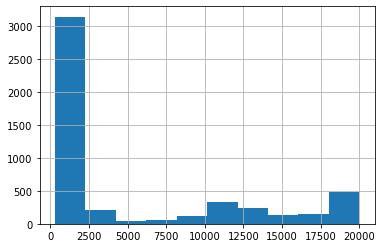

In [31]:
#now make a histogram with modified series
fb_likes_cap.hist()
#wHERE  produce more clips method

In [32]:
#the WHERE method allows us to display Sealing and flow data 
#hear we using CLIP method which consist of flow and Sealing method
fb_likes_cap2 = fb_likes.clip(lower=300,upper=20000)
fb_likes_cap.equals(fb_likes_cap)

True

# Masking Data Frame Rows
* Masking all rows of the movie dataset-after2010
* Filtering all the rows with missing values
* Introduction:
* The mask method operates opposite to the where method
* It creates missing values whereever Boolean condition is True
* It is literally masking, values in the dataset

In [33]:
movie = pd.read_csv(r'C:\Users\user\Desktop\Git_Python\New folder\data\movie.csv',index_col='movie_title')
c1 = movie['title_year']>=2010  #movies that are relesed before 2010
c2 = movie['title_year'].isnull() 
criteria = c1|c2

In [34]:
#checking the missing values with Mask method
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


here we showing Nan values

In [35]:
#to remove non missing values
movie_mask = movie.mask(criteria).dropna(how='all')
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


* This is the complex way doing Boolen indexing

In [36]:
#use the equal method to check the data types are same
movie_boolen = movie[movie['title_year']<2010]
movie_boolen.head()
#which displays an unequal result

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0


In [37]:
#by using 'EQUAL' method to verify
movie_mask.equals(movie_boolen)
#which displays they are not equal

False

In [38]:
#lets do some saniti checking
movie_mask.shape == movie_boolen.shape
#which displays the rows and columns are equal

True

In [39]:
#lets check the quality of the data type
movie_mask.dtypes ==movie_boolen.dtypes
#here we compare the two series of data types together

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

* assert_frame_equalmethod
* It is an alternative when data type of columns are not same
* It allows checking the equality of Series and DataFrames

In [40]:
#Import 'Assert Data Frame'
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolen,movie_mask,check_dtype=False)

* It wont generate any output if two dataframes are equal otherwise errors

## Selecting with Boolen Integer Location and Labels
* Filtering both rows and columns with Boolen indexing
* .loc and .iloc select rows and columns simultaneously
* These indexers can also do data selection through Boolean indexing
* Booleans are not integers and not labels

In [41]:
movie = pd.read_csv(r'C:\Users\user\Desktop\Git_Python\New folder\data\movie.csv',index_col='movie_title')
c1 = movie['content_rating']=='G'#select all the boolen matching to g
c2 = movie['imdb_score']<4 #which is less than 4
criteria = c1 &c2

In [42]:
#lets display the ndarray with one-dimension which displays criteria
a = criteria.values
a[:5]

array([False, False, False, False, False])

In [43]:
#lets check the length of both
len(a),len(criteria)
#here we have the both len

(4916, 4916)

In [44]:
#to filter the rows and display with head method
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [45]:
#check the dataframe indexing of the column on directly generated from the column
movie_loc.equals(movie[criteria])

True

#attempt to iloc same boolen indexing method
#movie_iloc = movie.iloc[criteria]
#we cannot use directely sereies and boolens diretly to index

In [46]:
#to extract the array 
movie.loc[criteria.values]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
Sunday School Musical,Color,Rachel Goldenberg,5.0,93.0,7.0,73.0,Mark Hengst,349.0,NaN,Drama|Musical,...,18.0,English,USA,G,NaN,2008.0,168.0,2.5,1.85,777


In [47]:
#to display data type of integer64
criteria_col = movie.dtypes ==np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [48]:
#to display all the columns with integer 64
movie.loc[:,criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [49]:
#even the iloc produces the same result ndarry int64
movie.iloc[:,criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [50]:
#to display particular columns from the particular column using the loc method
cols = ['content_rating','imdb_score','title_year','gross']
movie.loc[criteria,cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [51]:
#to represnts the integer columns location
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [52]:
# finally we pass to the .iloc columns
movie.iloc[criteria.values,col_index]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN


* Summary :
* Caliculated Boolean statistics
* Constructed multiple Boolean conditions
* Filtered with Boolean indexing
* Replicated Boolean indexing with index selection
* Selected rows with unique and sorted indexes
* Gainde perspective on stock prices